<h1 align=center><font size=5>Sentiment Analysis of IMDB Movie Reviews</font></h1>

Sentiment Analysis of IMDB Movie Reviews with ANN, CNN, LSTM, Bidirectional LSTM and CNN LSTM models.

### Data <a id="data"></a>

#### About IMDB movie reviews

Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive or negative). Reviews have been preprocessed, each review is encoded as a sequence of word indexes i.e integers. For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

####  Load IMDB dataset
Load the dataset in keras with having the top 5,000 most common words.

In [ ]:
from keras.datasets import imdb

vocab_size = 5000 
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words= vocab_size)

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

25000 train sequences
25000 test sequences


Convert the integers back to words

In [ ]:
word_index = imdb.get_word_index() # {'fawn': 34701, 'tsukino': 52006, 'nunnery': 52007,...}

INDEX_FROM = 3
word_index = {key:(value+INDEX_FROM) for key,value in word_index.items()}
word_index["<PAD>"] = 0    
word_index["<START>"] = 1  
word_index["<UNK>"] = 2    


reverse_word_index = {value:key for key, value in word_index.items()} 
# {34704: 'fawn', 52009: 'tsukino',52010: 'nunnery', ..}

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

decode_review(X_train[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly <UNK> was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little <UNK> that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big <UNK> for the whole film but these children are amazing and should be <UNK> for what the

#### Truncate and pad the data.

In [ ]:
from keras.preprocessing.sequence import pad_sequences

max_length = 500 

X_train = pad_sequences(X_train, value= word_index["<PAD>"], padding= 'post', maxlen= max_length)
X_test = pad_sequences(X_test, value= word_index["<PAD>"], padding= 'post', maxlen= max_length)

print('X_train shape:', X_train.shape) # (n_samples, sequence_length)
print('X_test shape:', X_test.shape)

X_train shape: (25000, 500)
X_test shape: (25000, 500)


Have a look at a sample of dataset.

In [ ]:
print(X_train[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
    2   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117    2   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194    2   18    4  226   22   21  134  476
   26  480    5  144   30    2   18   51   36   28  224   92   25  104
    4 

###  ANN model <a id="ann"></a>

Model Creation

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

embedding_dim = 16

model = Sequential()

model.add(Embedding(vocab_size, embedding_dim, input_length= max_length))
model.add(Flatten())

#model.add(GlobalAveragePooling1D()) # averages across the vector to flatten it out.

model.add(Dense(units= 16, activation= 'relu'))

#model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 16)           80000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                128016    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 208,033
Trainable params: 208,033
Non-trainable params: 0
_________________________________________________________________


Compile and train the model.

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


batch_size = 32
epochs = 10

history = model.fit(X_train, y_train,
          batch_size= batch_size,
          epochs= epochs,
          validation_split= 0.1)  

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 4s 183us/step - loss: 0.4618 - accuracy: 0.7490 - val_loss: 0.3756 - val_accuracy: 0.8372
Epoch 2/10
22500/22500 [==============================] - 2s 103us/step - loss: 0.2076 - accuracy: 0.9203 - val_loss: 0.3590 - val_accuracy: 0.8544
Epoch 3/10
22500/22500 [==============================] - 2s 103us/step - loss: 0.0922 - accuracy: 0.9701 - val_loss: 0.4169 - val_accuracy: 0.8512
Epoch 4/10
22500/22500 [==============================] - 2s 102us/step - loss: 0.0276 - accuracy: 0.9943 - val_loss: 0.5152 - val_accuracy: 0.8560
Epoch 5/10
22500/22500 [==============================] - 2s 100us/step - loss: 0.0074 - accuracy: 0.9993 - val_loss: 0.5875 - val_accuracy: 0.8568
Epoch 6/10
22500/22500 [==============================] - 2s 102us/step - loss: 0.0024 - accuracy: 0.9999 - val_loss: 0.6807 - val_accuracy: 0.8480
Epoch 7/10
22500/22500 [==============================] - 2s 10

Evaluate the model over test set.

In [ ]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

25000/25000 [==============================] - 1s 50us/step
Test score: 0.819623512929529
Test accuracy: 0.8487600088119507


Plot loss and accuracy metrics versus training epochs for both training and validation sets.

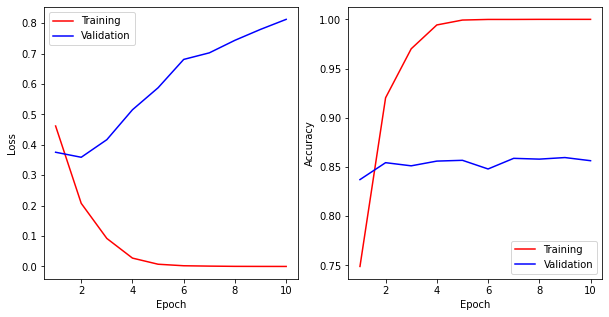

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_model(history):
    loss_train = history.history['loss']
    loss_vald = history.history['val_loss']

    acc_train = history.history['accuracy']
    acc_vald = history.history['val_accuracy']

    epochs = range(1, len(loss_train)+1)

    plt.figure(figsize=(10, 5))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss_train,'r')
    plt.plot(epochs, loss_vald,'b')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='best')

    plt.subplot(1,2,2)
    plt.plot(epochs, acc_train,'r')
    plt.plot(epochs, acc_vald,'b')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='best')
    plt.show()
    
plot_model(history)

###  CNN model <a id="cnn"></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense

embedding_dim = 16

model = Sequential()

model.add(Embedding(vocab_size, embedding_dim, input_length= max_length))
model.add(Dropout(0.2))

model.add(Conv1D(filters = 128, kernel_size = 5, strides= 1, padding='same', activation= 'relu'))

model.add(GlobalMaxPooling1D())

model.add(Dense(units= 256, activation= 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 16)           80000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 16)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 128)          10368     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

batch_size = 32
epochs = 3

history = model.fit(X_train, y_train,
          batch_size= batch_size,
          epochs= epochs,
          validation_split= 0.1)         

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 22500 samples, validate on 2500 samples
Epoch 1/3
22500/22500 [==============================] - 8s 343us/step - loss: 0.4596 - accuracy: 0.7573 - val_loss: 0.2875 - val_accuracy: 0.8844
Epoch 2/3
22500/22500 [==============================] - 3s 137us/step - loss: 0.2587 - accuracy: 0.8945 - val_loss: 0.2512 - val_accuracy: 0.9024
Epoch 3/3
22500/22500 [==============================] - 3s 138us/step - loss: 0.1974 - accuracy: 0.9225 - val_loss: 0.2443 - val_accuracy: 0.9088


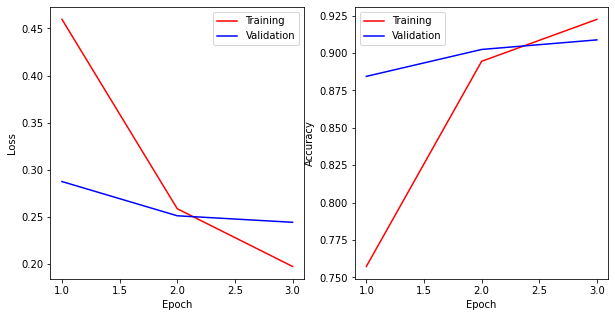

In [ ]:
plot_model(history)

In [ ]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

25000/25000 [==============================] - 1s 46us/step
Test score: 0.26104115900993347
Test accuracy: 0.8945199847221375


###  LSTM model <a id="lstm"></a>

In [ ]:
from keras.layers import LSTM


model = Sequential()

model.add(Embedding(vocab_size, embedding_dim, input_length= max_length))
#model.add(Dropout(0.2))

model.add(LSTM(128, dropout= 0.2, recurrent_dropout= 0.2))
model.add(Dense(1, activation= 'sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 16)           80000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               74240     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 154,369
Trainable params: 154,369
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

batch_size = 128
epochs = 3

history = model.fit(X_train, y_train,
          batch_size= batch_size,
          epochs= epochs,
          validation_split= 0.1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 22500 samples, validate on 2500 samples
Epoch 1/3
22500/22500 [==============================] - 171s 8ms/step - loss: 0.6931 - accuracy: 0.5028 - val_loss: 0.6927 - val_accuracy: 0.5100
Epoch 2/3
22500/22500 [==============================] - 173s 8ms/step - loss: 0.6916 - accuracy: 0.5124 - val_loss: 0.6926 - val_accuracy: 0.4896
Epoch 3/3
22500/22500 [==============================] - 172s 8ms/step - loss: 0.6848 - accuracy: 0.5081 - val_loss: 0.6893 - val_accuracy: 0.5004


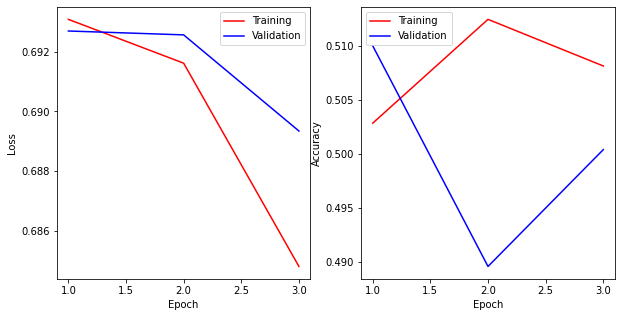

In [ ]:
plot_model(history)

In [ ]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

25000/25000 [==============================] - 56s 2ms/step
Test score: 0.6925866314315796
Test accuracy: 0.516319990158081


### Bidirectional LSTM model <a name="bilstm"></a>

In [ ]:
from keras.layers import Bidirectional, Dropout

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length= max_length))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 16)           80000     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               41472     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 121,601
Trainable params: 121,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

batch_size = 32
epochs = 5

history = model.fit(X_train, y_train,
          batch_size= batch_size,
          epochs= epochs,
          validation_split= 0.1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 22500 samples, validate on 2500 samples
Epoch 1/5
22500/22500 [==============================] - 1158s 51ms/step - loss: 0.5467 - accuracy: 0.7272 - val_loss: 0.4356 - val_accuracy: 0.8216
Epoch 2/5
22500/22500 [==============================] - 1149s 51ms/step - loss: 0.3805 - accuracy: 0.8505 - val_loss: 0.3636 - val_accuracy: 0.8688
Epoch 3/5
22500/22500 [==============================] - 1135s 50ms/step - loss: 0.3497 - accuracy: 0.8652 - val_loss: 0.3602 - val_accuracy: 0.8464
Epoch 4/5
22500/22500 [==============================] - 1136s 50ms/step - loss: 0.3331 - accuracy: 0.8726 - val_loss: 0.4000 - val_accuracy: 0.8408
Epoch 5/5
22500/22500 [==============================] - 1132s 50ms/step - loss: 0.6905 - accuracy: 0.6171 - val_loss: 0.5452 - val_accuracy: 0.7844


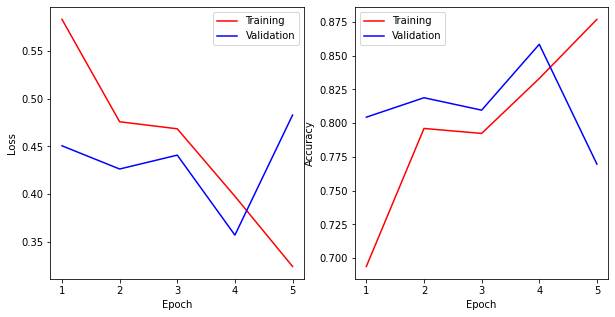

In [ ]:
plot_model(history)

In [ ]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

25000/25000 [==============================] - 98s 4ms/step
Test score: 0.502443071975708
Test accuracy: 0.7494000196456909


### CNN LSTM model <a name="cnnlstm"></a>

In [ ]:
from keras.layers import MaxPooling1D, Activation, Conv1D

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length= max_length))
model.add(Dropout(0.25))
model.add(Conv1D(filters = 64, kernel_size= 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size= 4))
model.add(LSTM(70))
model.add(Dense(1))
model.add(Activation('sigmoid'))


model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 500, 16)           80000     
_________________________________________________________________
dropout_3 (Dropout)          (None, 500, 16)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 64)           5184      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 124, 64)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 70)                37800     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 71        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

batch_size = 32
epochs = 10

history = model.fit(X_train, y_train,
          batch_size= batch_size,
          epochs= epochs,
          validation_split= 0.1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 138s 6ms/step - loss: 0.3419 - accuracy: 0.8643 - val_loss: 0.3206 - val_accuracy: 0.8696
Epoch 2/10
22500/22500 [==============================] - 138s 6ms/step - loss: 0.2572 - accuracy: 0.9015 - val_loss: 0.2802 - val_accuracy: 0.8884
Epoch 3/10
22500/22500 [==============================] - 137s 6ms/step - loss: 0.2156 - accuracy: 0.9192 - val_loss: 0.2602 - val_accuracy: 0.8972
Epoch 4/10
22500/22500 [==============================] - 137s 6ms/step - loss: 0.1848 - accuracy: 0.9320 - val_loss: 0.2685 - val_accuracy: 0.9008
Epoch 5/10
22500/22500 [==============================] - 136s 6ms/step - loss: 0.1561 - accuracy: 0.9464 - val_loss: 0.2658 - val_accuracy: 0.9000
Epoch 6/10
22500/22500 [==============================] - 136s 6ms/step - loss: 0.1376 - accuracy: 0.9541 - val_loss: 0.2820 - val_accuracy: 0.8972
Epoch 7/10
22500/22500 [==============================] - 136s 

In [ ]:
plot_model(history)

In [ ]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)